In [1]:
!pip install statsmodels

import statsmodels.api as sm
import pandas as pd

In [2]:
marketing = pd.read_csv("Data/marketing.csv")
marketing.head()

,Unnamed: 0,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48


In [20]:
import pandas as pd
import statsmodels.api as sm

# Assuming you have a dataframe named 'data' with columns 'sales' and 'youtube'
model = sm.OLS.from_formula('sales ~ youtube', marketing)
results = model.fit()

# Calculate predicted values and residuals
marketing['predicted'] = results.predict(marketing)
marketing['residuals'] = marketing['sales'] - marketing['predicted']
marketing

,Unnamed: 0,youtube,facebook,newspaper,sales,predicted,residuals
0,1,276.12,45.36,83.04,26.52,21.564929,4.955071
1,2,53.40,47.16,54.12,12.48,10.977569,1.502431
2,3,20.64,55.08,83.16,11.16,9.420269,1.739731
3,4,181.80,49.56,70.20,22.20,17.081273,5.118727
4,5,216.96,12.96,70.08,15.48,18.752662,-3.272662
...,...,...,...,...,...,...,...
195,196,45.84,4.44,16.56,9.12,10.618192,-1.498192
196,197,113.04,5.88,9.72,11.64,13.812654,-2.172654
197,198,212.40,11.16,7.68,15.36,18.535895,-3.175895
198,199,340.32,50.40,79.44,30.60,24.616782,5.983218


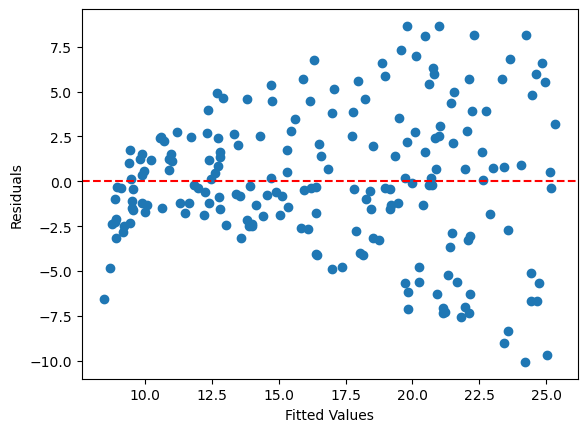

In [22]:
import matplotlib.pyplot as plt

plt.scatter(marketing['predicted'], marketing['residuals'])
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [41]:
import pandas as pd
import numpy as np
from plotnine import *


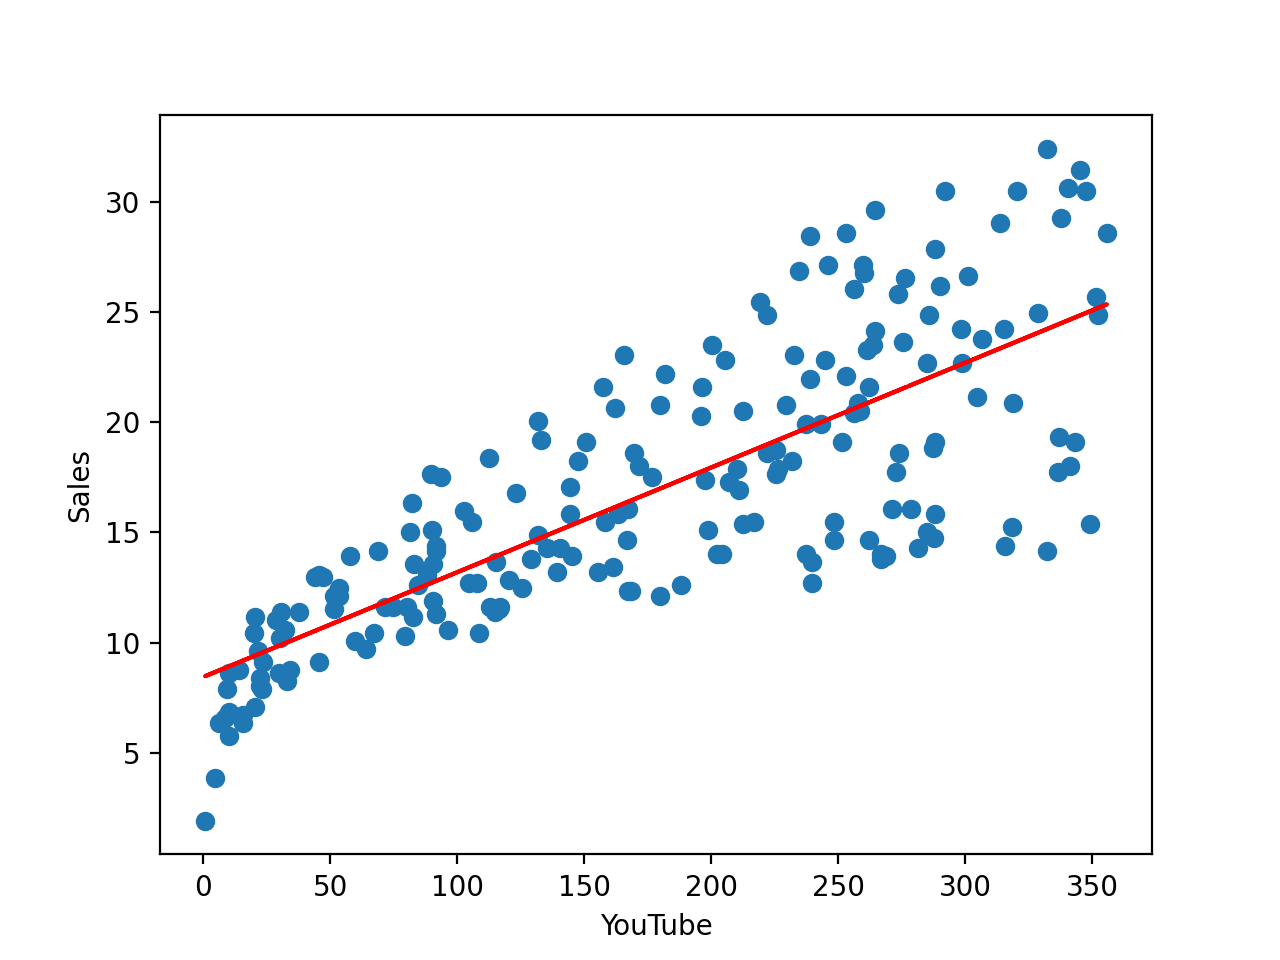

In [43]:

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have loaded your data into a DataFrame called 'marketing'
model = sm.OLS(marketing['sales'], sm.add_constant(marketing['youtube']))
results = model.fit()

# Plotting the results
plt.scatter(marketing['youtube'], marketing['sales'])
plt.plot(marketing['youtube'], results.fittedvalues, color='red')
plt.xlabel('YouTube')
plt.ylabel('Sales')
plt.show()


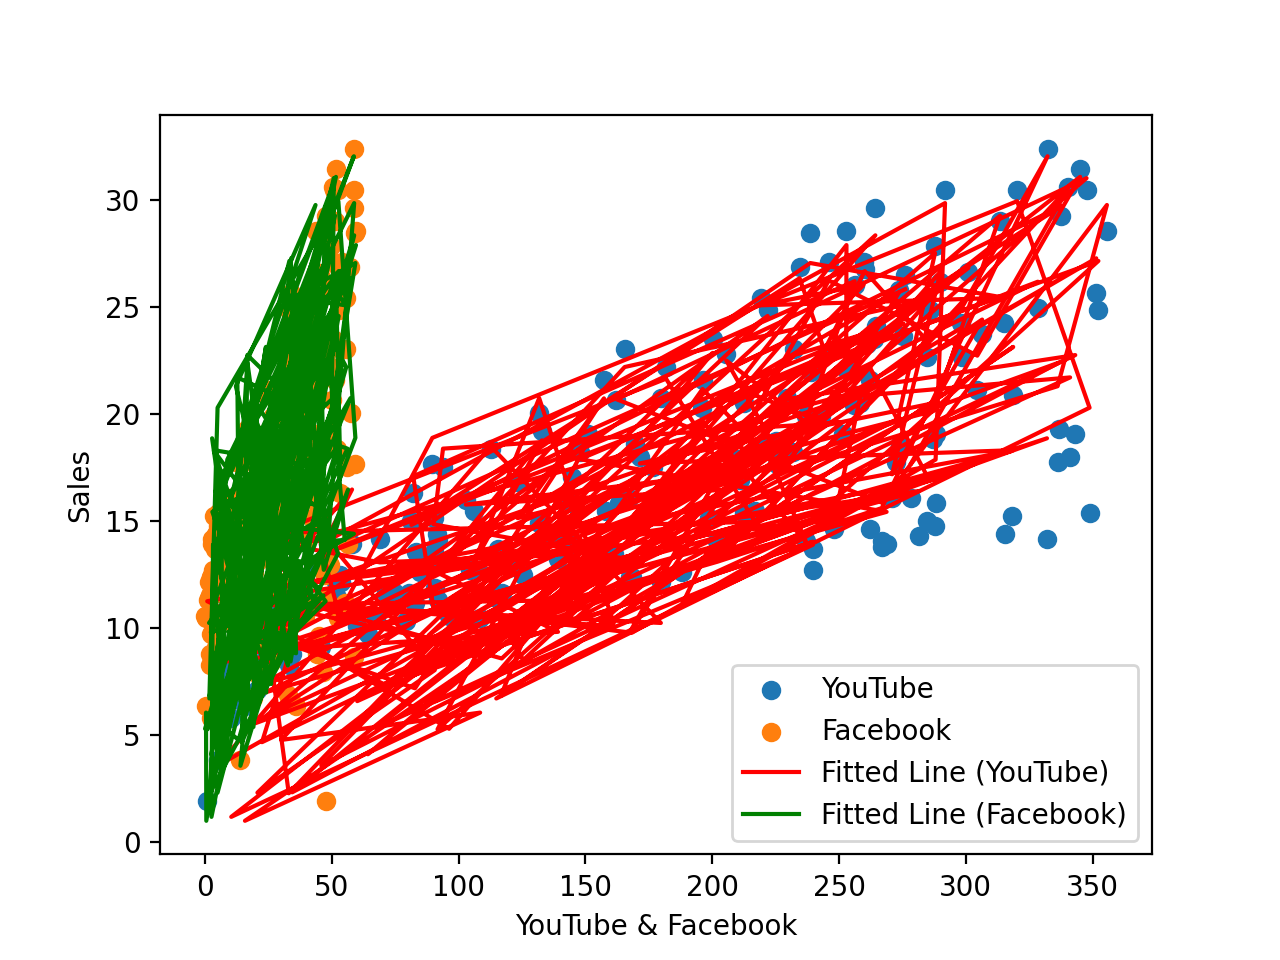

In [44]:

marketing['intercept'] = 1  # Add an intercept column to the DataFrame

# Define the independent variables
X = marketing[['youtube', 'facebook']]

# Define the dependent variable
y = marketing['sales']

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Plotting the results
fig, ax = plt.subplots()
ax.scatter(marketing['youtube'], y, label='YouTube')
ax.scatter(marketing['facebook'], y, label='Facebook')
ax.plot(marketing['youtube'], results.fittedvalues, color='red', label='Fitted Line (YouTube)')
ax.plot(marketing['facebook'], results.fittedvalues, color='green', label='Fitted Line (Facebook)')
ax.set_xlabel('YouTube & Facebook')
ax.set_ylabel('Sales')
ax.legend()
plt.show()


In [45]:
model = sm.OLS(marketing['sales'], sm.add_constant(marketing['youtube']))
results = model.fit()

# Print the summary of the linear regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        10:30:46   Log-Likelihood:                -555.51
No. Observations:                 200   AIC:                             1115.
Df Residuals:                     198   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4391      0.549     15.360      0.0

In [48]:
model = sm.OLS(marketing['sales'], sm.add_constant(marketing[['youtube','facebook']]))
results = model.fit()

# Print the summary of the linear regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           4.83e-98
Time:                        10:32:22   Log-Likelihood:                -422.66
No. Observations:                 200   AIC:                             851.3
Df Residuals:                     197   BIC:                             861.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5053      0.353      9.919      0.0

In [49]:
model = sm.OLS(marketing['sales'], sm.add_constant(marketing['newspaper']))
results = model.fit()

# Print the summary of the linear regression model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 18 Jun 2023   Prob (F-statistic):            0.00115
Time:                        10:32:48   Log-Likelihood:                -644.80
No. Observations:                 200   AIC:                             1294.
Df Residuals:                     198   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8217      0.746     19.876      0.0